# Text Report
By: Victoria Smith

## 1. Overview
### 1.1 Purpose
The purpose of this report is to determine the conversation topic and the negativity and/or positivity of the conversation.
### 1.2 Research Questions
What is the topic of the convesation?

Do majority of people feel positive or negative about the topic?
### 1.3 Terms to Know
Sentiments: view/attitude toward an event or situation (an opinion.)

Stopwords: commonly used words that give little value.

Tokenize: Separting a piece of data (text) into smaller pieces called tokens.

Valence Aware Dictionary and Sentiment Reasoner (VADER): Sentimental analysis that analyzes the sentsitivity (postivity/negativity) and intensity (emotion) of text by summing the intensity of words in the text. 

## 2. Environment Set Up

Python Version:

3.9.1

Required Packages:

In [1]:
import pandas as ps
import nltk
from nltk import tokenize as tk
from nltk import FreqDist
from nltk.corpus import stopwords as sw
from matplotlib import pyplot as mplt
import string
from collections import Counter
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import warnings
from datetime import datetime as dt
from scipy import stats

## 3. Data

The data used in this report comes from a set of comments on a YouTube video, [The Safety & Efficacy of Potential COVID Vaccine](https://youtu.be/sT80A5uPREo).The comments in the data file are meant to focus on those who are for and against COVID-19 vaccinations from a time period of: Decemeber 14 - December 26 2020. The File "YouTube Vaccination" was imported into a Python 3 environment.

Loading Data File:

In [2]:
vacc = ps.read_csv(r"YouTubeVaccination.csv")

## 4. Data Structure

Identifying the Columns in the file:

In [3]:
vacc.keys()

Index(['Date', 'Title', 'Url', 'Domain', 'Page Type', 'Language', 'Author',
       'Full Name', 'Full Text', 'Original Url', 'Thread Entry Type',
       'Page Type Name', 'Pub Type'],
      dtype='object')

Extracting English only comments:

In [4]:
lang = vacc.loc[vacc['Language'] == 'en']
lang

,Date,Title,Url,Domain,Page Type,Language,Author,Full Name,Full Text,Original Url,Thread Entry Type,Page Type Name,Pub Type
0,12/26/2020 23:56,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=sT80A5uPREolc=...,youtube.com,youtube,en,RJ MacReady,RJ MacReady,"I got the Moderna vaccine, hereâ€™s my list of...",https://www.youtube.com/watch?v=sT80A5uPREolc=...,reply,YouTube,VCOMMENT
1,12/26/2020 23:36,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=dxVCqwAD8gQlc=...,youtube.com,youtube,en,dontaskme,dontaskme,@Charlotte Haggerty Do you really believe ever...,https://www.youtube.com/watch?v=dxVCqwAD8gQlc=...,reply,YouTube,VCOMMENT
2,12/26/2020 23:34,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=2Wz7KvLFgYQlc=...,youtube.com,youtube,en,Salavin,Salavin,"I hate it when they say ""You don't want a covi...",https://www.youtube.com/watch?v=2Wz7KvLFgYQlc=...,reply,YouTube,VCOMMENT
3,12/26/2020 23:30,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=dxVCqwAD8gQlc=...,youtube.com,youtube,en,dontaskme,dontaskme,"@Sweet Heart Well, Quantas, an Australian airl...",https://www.youtube.com/watch?v=dxVCqwAD8gQlc=...,reply,YouTube,VCOMMENT
4,12/26/2020 23:27,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=7VG_s2PCH_clc=...,youtube.com,youtube,en,Kristi Allman,Kristi Allman,@AngryAngy Here they recommend a flu shot duri...,https://www.youtube.com/watch?v=7VG_s2PCH_clc=...,reply,YouTube,VCOMMENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12486,12/13/2020 0:12,Comment on video https://www.youtube.com/watch...,http://www.youtube.com/all_comments?v=JMEK0-zO...,youtube.com,youtube,en,Sarah Wales,NaN,Pfizer - The most fined Corporation in the US ...,http://www.youtube.com/all_comments?v=JMEK0-zO...,reply,YouTube,VCOMMENT
12487,12/13/2020 0:11,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=aWAly3INavMlc=...,youtube.com,youtube,en,Damoreah Mitchell,NaN,How is this women the first person to get the ...,https://www.youtube.com/watch?v=aWAly3INavMlc=...,reply,YouTube,VCOMMENT
12488,12/13/2020 0:07,Comment on video https://www.youtube.com/watch...,http://www.youtube.com/all_comments?v=XWG_Jypo...,youtube.com,youtube,en,Adelaide Hemlock,NaN,Breast cancer survivor: good question! Iâ€™ve ...,http://www.youtube.com/all_comments?v=XWG_Jypo...,reply,YouTube,VCOMMENT
12489,12/13/2020 0:02,Comment on video https://www.youtube.com/watch...,http://www.youtube.com/all_comments?v=tG7CzK5J...,youtube.com,youtube,en,Flumazenil,NaN,Panel members first to get the vaccine.,http://www.youtube.com/all_comments?v=tG7CzK5J...,reply,YouTube,VCOMMENT


## 5. Text Analysis
Analyzing the contents of the comments

Lowercasing the comments:

In [5]:
lang['text_lower'] = [x.lower() for x in lang['Full Text']]
lang['text_lower'].head()

0    i got the moderna vaccine, hereâ€™s my list of...
1    @charlotte haggerty do you really believe ever...
2    i hate it when they say "you don't want a covi...
3    @sweet heart well, quantas, an australian airl...
4    @angryangy here they recommend a flu shot duri...
Name: text_lower, dtype: object

Tokenizing all comments in text_lower:

In [6]:
lang['tokens'] = [tk.word_tokenize(x) for x in lang['text_lower']]
lang['tokens'].head()

0    [i, got, the, moderna, vaccine, ,, hereâ€™s, m...
1    [@, charlotte, haggerty, do, you, really, beli...
2    [i, hate, it, when, they, say, ``, you, do, n'...
3    [@, sweet, heart, well, ,, quantas, ,, an, aus...
4    [@, angryangy, here, they, recommend, a, flu, ...
Name: tokens, dtype: object

Identifying all of the english stopwords:

In [7]:
sw.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

There are now 184 stopwords:

In [8]:
mystopwords = sw.words('english')
mystopwords.append("n't")
mystopwords.append("'s")
mystopwords.append("..")
mystopwords.append("")
mystopwords.append("--")
len(mystopwords)

184

Words in the data file that are not stopwords:

In [9]:
for i in lang['tokens'][0:10]:
    for word in i:
        if word not in mystopwords:
            print(word)

got
moderna
vaccine
,
hereâ€™s
list
side
effects
:
https
:
//youtu.be/9swygynujao
@
charlotte
haggerty
really
believe
everything
told
?
,
vaccines
end
pandemic
.
herd
immunization
.
however
,
claim
vaccine
.
virus
gone
august
,
btw
.
hate
say
``
want
covid
vaccine
?
well
,
worked
smallpox
polio
!
!
!
''
.
yeah
difference
:
covid
even
0.1
%
deadly
smallpox
example
.
issue
.
'm
definitely
vaccines
,
would
stupid
great
advancement
mankind
.
vaccinate
everything
?
mean
cmon
...
support
covid
vaccinations
people
older
65
etc
definitely
people
ages
0-35
...
@
sweet
heart
well
,
quantas
,
australian
airline
,
already
made
one
fly
unless
stamp
passport
showing
got
vaccine
.
next
?
maybe
tattoo
hand
.
look
,
china
already
citizens
,
controlling
moves
.
something
wrong
,
get
strike
,
meaning
wo
allowed
supermarket
,
public
places
,
airport
.
vaccine
one
step
get
(
u.n.
2030
agenda
....
look
)
want
.
@
angryangy
recommend
flu
shot
pregnancy
babies
6
months
year
flu
shot
.
multiple
dose
flu
vaccin

Filtering (removing) the stopwords and non-important punctuation in the comments:

In [10]:
filtered_sw = []
for i in lang['tokens']:
    filtered_sw.append([word for word in i if word not in mystopwords])
    
lang['filtered_sw'] = filtered_sw
lang['filtered_sw']

0        [got, moderna, vaccine, ,, hereâ€™s, list, sid...
1        [@, charlotte, haggerty, really, believe, ever...
2        [hate, say, ``, want, covid, vaccine, ?, well,...
3        [@, sweet, heart, well, ,, quantas, ,, austral...
4        [@, angryangy, recommend, flu, shot, pregnancy...
                               ...                        
12486    [pfizer, -, fined, corporation, us, fraud, cri...
12487    [women, first, person, get, vaccine, ?, people...
12488    [breast, cancer, survivor, :, good, question, ...
12489             [panel, members, first, get, vaccine, .]
12490    [@, tom, r, wo, return, easily, ., many, busin...
Name: filtered_sw, Length: 12491, dtype: object

In [11]:
no_punct = []
for i in lang['filtered_sw']:
    no_punct.append([word for word in i if word not in string.punctuation])
    
lang['no_punct'] = no_punct
lang['no_punct']

0        [got, moderna, vaccine, hereâ€™s, list, side, ...
1        [charlotte, haggerty, really, believe, everyth...
2        [hate, say, ``, want, covid, vaccine, well, wo...
3        [sweet, heart, well, quantas, australian, airl...
4        [angryangy, recommend, flu, shot, pregnancy, b...
                               ...                        
12486    [pfizer, fined, corporation, us, fraud, crimin...
12487    [women, first, person, get, vaccine, people, m...
12488    [breast, cancer, survivor, good, question, iâ€...
12489                [panel, members, first, get, vaccine]
12490    [tom, r, wo, return, easily, many, businesses,...
Name: no_punct, Length: 12491, dtype: object

### 5.1 Word Frequency Analysis
Counting the frequency of words in the comments.

In [12]:
freq1 = [FreqDist(x) for x in lang['no_punct']]
lang['freqs1'] = freq1
lang['freqs1']

0        {'got': 1, 'moderna': 1, 'vaccine': 1, 'hereâ€...
1        {'charlotte': 1, 'haggerty': 1, 'really': 1, '...
2        {'hate': 1, 'say': 1, '``': 1, 'want': 1, 'cov...
3        {'sweet': 1, 'heart': 1, 'well': 1, 'quantas':...
4        {'angryangy': 1, 'recommend': 1, 'flu': 5, 'sh...
                               ...                        
12486    {'pfizer': 1, 'fined': 1, 'corporation': 1, 'u...
12487    {'women': 1, 'first': 3, 'person': 2, 'get': 1...
12488    {'breast': 1, 'cancer': 1, 'survivor': 1, 'goo...
12489    {'panel': 1, 'members': 1, 'first': 1, 'get': ...
12490    {'tom': 1, 'r': 1, 'wo': 1, 'return': 1, 'easi...
Name: freqs1, Length: 12491, dtype: object

In [13]:
A = Counter(lang['freqs1'][0])
B = Counter(lang['freqs1'][1])
A + B

Counter({'got': 1,
         'moderna': 1,
         'vaccine': 2,
         'hereâ€™s': 1,
         'list': 1,
         'side': 1,
         'effects': 1,
         'https': 1,
         '//youtu.be/9swygynujao': 1,
         'charlotte': 1,
         'haggerty': 1,
         'really': 1,
         'believe': 1,
         'everything': 1,
         'told': 1,
         'vaccines': 1,
         'end': 1,
         'pandemic': 1,
         'herd': 1,
         'immunization': 1,
         'however': 1,
         'claim': 1,
         'virus': 1,
         'gone': 1,
         'august': 1,
         'btw': 1})

In [14]:
lang['f1_counts'] = [Counter(x) for x in lang['freqs1']]
lang['f1_counts']

0        {'got': 1, 'moderna': 1, 'vaccine': 1, 'hereâ€...
1        {'charlotte': 1, 'haggerty': 1, 'really': 1, '...
2        {'hate': 1, 'say': 1, '``': 1, 'want': 1, 'cov...
3        {'sweet': 1, 'heart': 1, 'well': 1, 'quantas':...
4        {'angryangy': 1, 'recommend': 1, 'flu': 5, 'sh...
                               ...                        
12486    {'pfizer': 1, 'fined': 1, 'corporation': 1, 'u...
12487    {'women': 1, 'first': 3, 'person': 2, 'get': 1...
12488    {'breast': 1, 'cancer': 1, 'survivor': 1, 'goo...
12489    {'panel': 1, 'members': 1, 'first': 1, 'get': ...
12490    {'tom': 1, 'r': 1, 'wo': 1, 'return': 1, 'easi...
Name: f1_counts, Length: 12491, dtype: object

In [15]:
wordcounts = Counter()
for i in lang['f1_counts']:
    wordcounts += i

30,527 words have been identified:

In [16]:
len(wordcounts)

31926

The frequency of all 30,527 words:

In [17]:
dict(wordcounts)

{'got': 703,
 'moderna': 297,
 'vaccine': 17148,
 'hereâ€™s': 17,
 'list': 96,
 'side': 810,
 'effects': 889,
 'https': 4469,
 '//youtu.be/9swygynujao': 2,
 'charlotte': 13,
 'haggerty': 3,
 'really': 613,
 'believe': 754,
 'everything': 407,
 'told': 328,
 'vaccines': 2007,
 'end': 465,
 'pandemic': 868,
 'herd': 126,
 'immunization': 33,
 'however': 191,
 'claim': 118,
 'virus': 2699,
 'gone': 131,
 'august': 23,
 'btw': 48,
 'hate': 113,
 'say': 946,
 '``': 2989,
 'want': 1192,
 'covid': 2772,
 'well': 606,
 'worked': 83,
 'smallpox': 53,
 'polio': 150,
 "''": 2969,
 'yeah': 200,
 'difference': 88,
 'even': 1449,
 '0.1': 12,
 'deadly': 219,
 'example': 115,
 'issue': 137,
 "'m": 729,
 'definitely': 104,
 'would': 1867,
 'stupid': 207,
 'great': 380,
 'advancement': 3,
 'mankind': 17,
 'vaccinate': 137,
 'mean': 311,
 'cmon': 6,
 '...': 2515,
 'support': 118,
 'vaccinations': 167,
 'people': 4894,
 'older': 118,
 '65': 21,
 'etc': 321,
 'ages': 33,
 '0-35': 1,
 'sweet': 10,
 'heart':

The top 33 words with the highest frequencies arranged in decending order:

In [18]:
counts = ps.DataFrame.from_dict(dict(wordcounts), orient='index')
counts = counts.rename(columns = {0: 'counts'})
counts_sort = counts.sort_values('counts', ascending = False)[:33]
counts_sort

,counts
vaccine,17148
people,4894
https,4469
get,3195
``,2989
'',2969
take,2805
covid,2772
virus,2699
...,2515


A plot of the top 33 words:

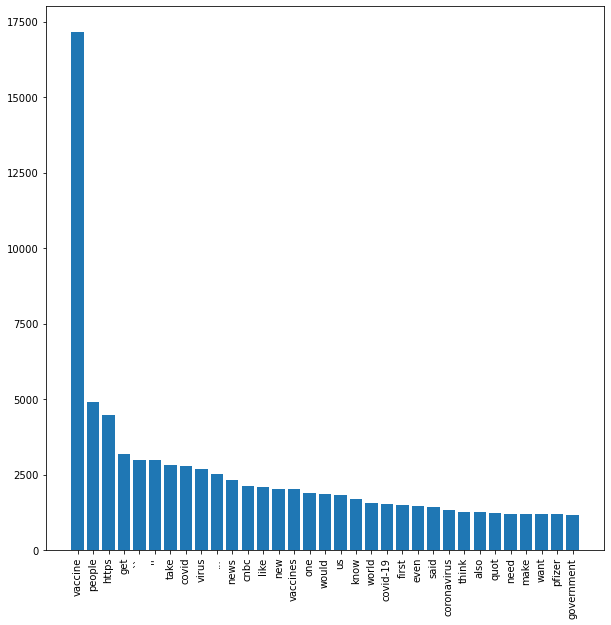

In [19]:
fig, ax1 = mplt.subplots(figsize=(10,10))
ax1.bar(counts_sort.index, counts_sort['counts'])
mplt.xticks(rotation=90, fontsize = 'medium')
mplt.show()

The words mentioned the most were vaccine and people.

### 5.2 VADER Analysis
Valence Aware Dictionary and Sentiment Reasoner (VADER)

In [20]:
analyser = SentimentIntensityAnalyzer()
warnings.filterwarnings('ignore')

Polarity Indices for the 4th comment in the file:

In [21]:
print(lang['Full Text'][3])
print(analyser.polarity_scores(lang['Full Text'][3]))

@Sweet Heart Well, Quantas, an Australian airline, has already made it that no one can fly with them unless they have a stamp on their passport showing that they got the vaccine. What will be next? Maybe a tattoo on your hand. Look, China is already doing this with their citizens, controlling all their moves. You do something wrong, you get a strike, meaning that you won't be allowed in a supermarket, or public places, or in an airport. The vaccine is just one step to get there where they (the U.N. and their 2030 agenda....look it up) want you.
{'neg': 0.06, 'neu': 0.817, 'pos': 0.123, 'compound': 0.7906}


The analysis for the first 20 comments:

In [22]:
lang['vader_scores'] = [analyser.polarity_scores(x) for x in lang['Full Text']]
lang['vader_scores'].head(20)

0     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2     {'neg': 0.076, 'neu': 0.728, 'pos': 0.196, 'co...
3     {'neg': 0.06, 'neu': 0.817, 'pos': 0.123, 'com...
4     {'neg': 0.105, 'neu': 0.792, 'pos': 0.103, 'co...
5     {'neg': 0.0, 'neu': 0.949, 'pos': 0.051, 'comp...
6     {'neg': 0.098, 'neu': 0.902, 'pos': 0.0, 'comp...
7     {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'comp...
8     {'neg': 0.036, 'neu': 0.811, 'pos': 0.154, 'co...
9     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
10    {'neg': 0.047, 'neu': 0.886, 'pos': 0.067, 'co...
11    {'neg': 0.246, 'neu': 0.719, 'pos': 0.035, 'co...
12    {'neg': 0.051, 'neu': 0.882, 'pos': 0.067, 'co...
13    {'neg': 0.135, 'neu': 0.778, 'pos': 0.087, 'co...
14    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
15    {'neg': 0.155, 'neu': 0.845, 'pos': 0.0, 'comp...
16    {'neg': 0.134, 'neu': 0.841, 'pos': 0.025, 'co...
17    {'neg': 0.064, 'neu': 0.638, 'pos': 0.298,

In [23]:
lang['pos'] = [x['pos'] for x in lang['vader_scores']]
lang['pos']

0        0.000
1        0.000
2        0.196
3        0.123
4        0.103
         ...  
12486    0.127
12487    0.131
12488    0.178
12489    0.000
12490    0.000
Name: pos, Length: 12491, dtype: float64

In [24]:
lang['neg'] = [x['neg'] for x in lang['vader_scores']]
lang['neg']

0        0.000
1        0.000
2        0.076
3        0.060
4        0.105
         ...  
12486    0.229
12487    0.000
12488    0.271
12489    0.000
12490    0.187
Name: neg, Length: 12491, dtype: float64

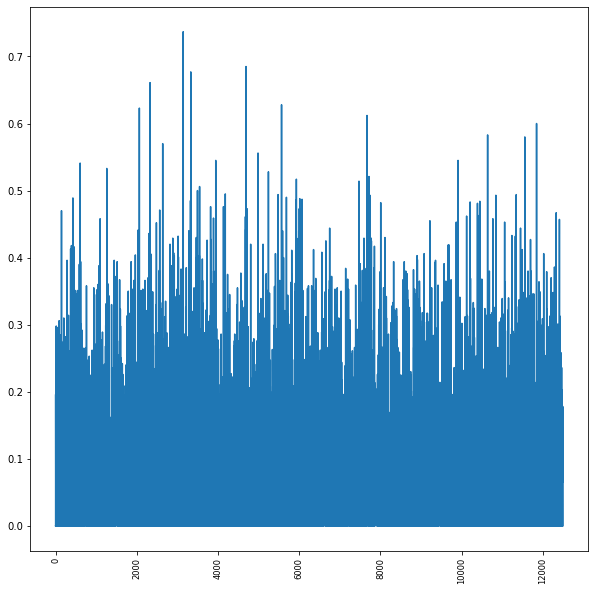

In [25]:
fig, ax0 = mplt.subplots(figsize = (10,10))
ax0.plot(lang['pos'])
mplt.xticks(rotation=90, fontsize = 'small')
mplt.show()

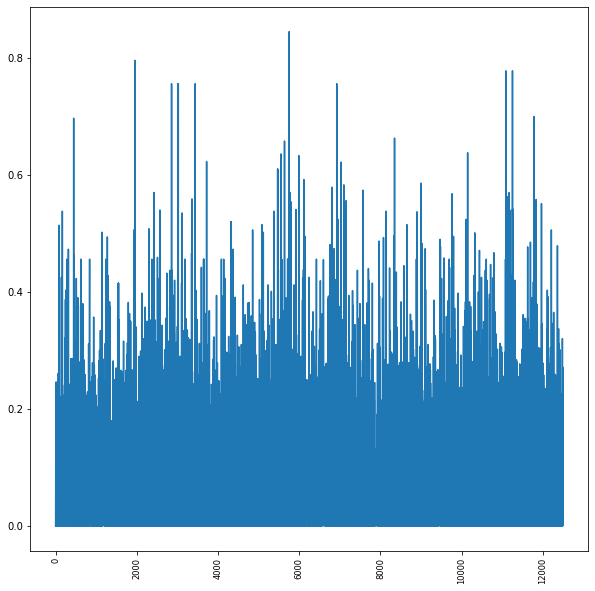

In [26]:
fig, ax0 = mplt.subplots(figsize = (10,10))
ax0.plot(lang['neg'])
mplt.xticks(rotation=90, fontsize = 'small')
mplt.show()

In [27]:
lang['Datetime'] = [dt.strptime(x, '%m/%d/%Y %H:%M') for x in lang['Date']]
print(type(lang['Datetime'][0]))
print(lang['Datetime'][0])

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2020-12-26 23:56:00


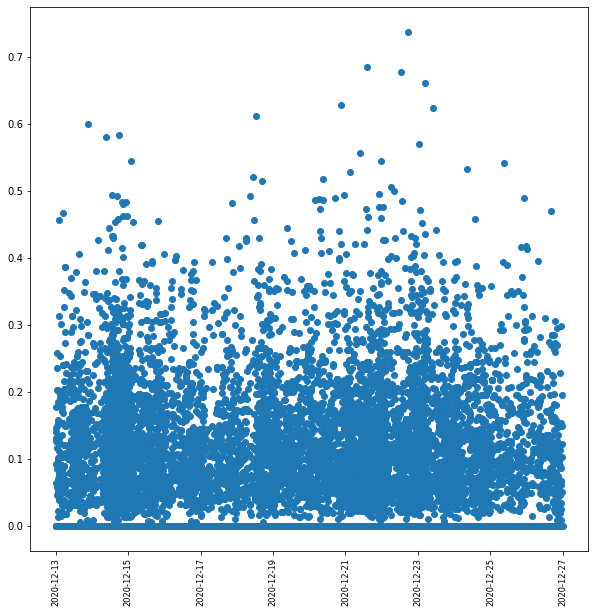

In [28]:
fig, ax1 = mplt.subplots(figsize = (10,10))
ax1.scatter(lang['Datetime'], lang['pos'])
mplt.xticks(rotation=90, fontsize = 'small')
mplt.show()

In [29]:
start_vacc = lang.loc[lang['Datetime'] < '2020-12-21 00:00:00.0'].reset_index()
start_vacc

,index,Date,Title,Url,Domain,Page Type,Language,Author,Full Name,Full Text,...,text_lower,tokens,filtered_sw,no_punct,freqs1,f1_counts,vader_scores,pos,neg,Datetime
0,5422,12/20/2020 23:58,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=XB5HtKtGijYlc=...,youtube.com,youtube,en,Lone Tony,NaN,â˜ ï¸oof betting that zombies will eventually...,...,â˜ ï¸oof betting that zombies will eventually...,"[â˜, ï¸oof, betting, that, zombies, will, eve...","[â˜, ï¸oof, betting, zombies, eventually, com...","[â˜, ï¸oof, betting, zombies, eventually, com...","{'â˜': 1, 'ï¸oof': 1, 'betting': 1, 'zombies'...","{'â˜': 1, 'ï¸oof': 1, 'betting': 1, 'zombies'...","{'neg': 0.225, 'neu': 0.699, 'pos': 0.076, 'co...",0.076,0.225,2020-12-20 23:58:00
1,5423,12/20/2020 23:56,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=yNI8UH8xwV4lc=...,youtube.com,youtube,en,Little Lee,NaN,@Australia Virus- India Virus- America Virus i...,...,@australia virus- india virus- america virus i...,"[@, australia, virus-, india, virus-, america,...","[@, australia, virus-, india, virus-, america,...","[australia, virus-, india, virus-, america, vi...","{'australia': 1, 'virus-': 2, 'india': 1, 'ame...","{'australia': 1, 'virus-': 2, 'india': 1, 'ame...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,2020-12-20 23:56:00
2,5424,12/20/2020 23:55,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=XB5HtKtGijYlc=...,youtube.com,youtube,en,Cam S,NaN,Am I missing something? A new variant but they...,...,am i missing something? a new variant but they...,"[am, i, missing, something, ?, a, new, variant...","[missing, something, ?, new, variant, 're, sti...","[missing, something, new, variant, 're, still,...","{'missing': 1, 'something': 1, 'new': 2, 'vari...","{'missing': 1, 'something': 1, 'new': 2, 'vari...","{'neg': 0.31, 'neu': 0.69, 'pos': 0.0, 'compou...",0.000,0.310,2020-12-20 23:55:00
3,5425,12/20/2020 23:55,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=XB5HtKtGijYlc=...,youtube.com,youtube,en,A Bee,NaN,I have thought this all along. They need a dif...,...,i have thought this all along. they need a dif...,"[i, have, thought, this, all, along, ., they, ...","[thought, along, ., need, different, flu, vacc...","[thought, along, need, different, flu, vaccine...","{'thought': 1, 'along': 1, 'need': 1, 'differe...","{'thought': 1, 'along': 1, 'need': 1, 'differe...","{'neg': 0.192, 'neu': 0.808, 'pos': 0.0, 'comp...",0.000,0.192,2020-12-20 23:55:00
4,5426,12/20/2020 23:54,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=XB5HtKtGijYlc=...,youtube.com,youtube,en,Detlef Die Soos,NaN,"If this strain doesnt mind the vaccine, the br...",...,"if this strain doesnt mind the vaccine, the br...","[if, this, strain, doesnt, mind, the, vaccine,...","[strain, doesnt, mind, vaccine, ,, british, go...","[strain, doesnt, mind, vaccine, british, gover...","{'strain': 1, 'doesnt': 1, 'mind': 1, 'vaccine...","{'strain': 1, 'doesnt': 1, 'mind': 1, 'vaccine...","{'neg': 0.236, 'neu': 0.64, 'pos': 0.123, 'com...",0.123,0.236,2020-12-20 23:54:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7064,12486,12/13/2020 0:12,Comment on video https://www.youtube.com/watch...,http://www.youtube.com/all_comments?v=JMEK0-zO...,youtube.com,youtube,en,Sarah Wales,NaN,Pfizer - The most fined Corporation in the US ...,...,pfizer - the most fined corporation in the us ...,"[pfizer, -, the, most, fined, corporation, in,...","[pfizer, -, fined, corporation, us, fraud, cri...","[pfizer, fined, corporation, us, fraud, crimin...","{'pfizer': 1, 'fined': 1, 'corporation': 1, 'u...","{'pfizer': 1, 'fined': 1, 'corporation': 1, 'u...","{'neg': 0.229, 'neu': 0.644, 'pos': 0.127, 'co...",0.127,0.229,2020-12-13 00:12:00
7065,12487,12/13/2020 0:11,Comment on video https://www.youtube.com/watch...,https://

In [30]:
end_vacc = lang.loc[lang['Datetime'] > '2020-12-21 00:00:00.0'].reset_index()
end_vacc

,index,Date,Title,Url,Domain,Page Type,Language,Author,Full Name,Full Text,...,text_lower,tokens,filtered_sw,no_punct,freqs1,f1_counts,vader_scores,pos,neg,Datetime
0,0,12/26/2020 23:56,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=sT80A5uPREolc=...,youtube.com,youtube,en,RJ MacReady,RJ MacReady,"I got the Moderna vaccine, hereâ€™s my list of...",...,"i got the moderna vaccine, hereâ€™s my list of...","[i, got, the, moderna, vaccine, ,, hereâ€™s, m...","[got, moderna, vaccine, ,, hereâ€™s, list, sid...","[got, moderna, vaccine, hereâ€™s, list, side, ...","{'got': 1, 'moderna': 1, 'vaccine': 1, 'hereâ€...","{'got': 1, 'moderna': 1, 'vaccine': 1, 'hereâ€...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,2020-12-26 23:56:00
1,1,12/26/2020 23:36,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=dxVCqwAD8gQlc=...,youtube.com,youtube,en,dontaskme,dontaskme,@Charlotte Haggerty Do you really believe ever...,...,@charlotte haggerty do you really believe ever...,"[@, charlotte, haggerty, do, you, really, beli...","[@, charlotte, haggerty, really, believe, ever...","[charlotte, haggerty, really, believe, everyth...","{'charlotte': 1, 'haggerty': 1, 'really': 1, '...","{'charlotte': 1, 'haggerty': 1, 'really': 1, '...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,2020-12-26 23:36:00
2,2,12/26/2020 23:34,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=2Wz7KvLFgYQlc=...,youtube.com,youtube,en,Salavin,Salavin,"I hate it when they say ""You don't want a covi...",...,"i hate it when they say ""you don't want a covi...","[i, hate, it, when, they, say, ``, you, do, n'...","[hate, say, ``, want, covid, vaccine, ?, well,...","[hate, say, ``, want, covid, vaccine, well, wo...","{'hate': 1, 'say': 1, '``': 1, 'want': 1, 'cov...","{'hate': 1, 'say': 1, '``': 1, 'want': 1, 'cov...","{'neg': 0.076, 'neu': 0.728, 'pos': 0.196, 'co...",0.196,0.076,2020-12-26 23:34:00
3,3,12/26/2020 23:30,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=dxVCqwAD8gQlc=...,youtube.com,youtube,en,dontaskme,dontaskme,"@Sweet Heart Well, Quantas, an Australian airl...",...,"@sweet heart well, quantas, an australian airl...","[@, sweet, heart, well, ,, quantas, ,, an, aus...","[@, sweet, heart, well, ,, quantas, ,, austral...","[sweet, heart, well, quantas, australian, airl...","{'sweet': 1, 'heart': 1, 'well': 1, 'quantas':...","{'sweet': 1, 'heart': 1, 'well': 1, 'quantas':...","{'neg': 0.06, 'neu': 0.817, 'pos': 0.123, 'com...",0.123,0.060,2020-12-26 23:30:00
4,4,12/26/2020 23:27,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=7VG_s2PCH_clc=...,youtube.com,youtube,en,Kristi Allman,Kristi Allman,@AngryAngy Here they recommend a flu shot duri...,...,@angryangy here they recommend a flu shot duri...,"[@, angryangy, here, they, recommend, a, flu, ...","[@, angryangy, recommend, flu, shot, pregnancy...","[angryangy, recommend, flu, shot, pregnancy, b...","{'angryangy': 1, 'recommend': 1, 'flu': 5, 'sh...","{'angryangy': 1, 'recommend': 1, 'flu': 5, 'sh...","{'neg': 0.105, 'neu': 0.792, 'pos': 0.103, 'co...",0.103,0.105,2020-12-26 23:27:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5413,5413,12/21/2020 0:08,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=XB5HtKtGijYlc=...,youtube.com,youtube,en,Eamon Mc Laughlin,NaN,all about the vaccine. follow the money,...,all about the vaccine. follow the money,"[all, about, the, vaccine, ., follow, the, money]","[vaccine, ., follow, money]","[vaccine, follow, money]","{'vaccine': 1, 'follow': 1, 'money': 1}","{'vaccine': 1, 'follow': 1, 'money': 1}","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,2020-12-21 00:08:00
5414,5414,12/21/2020 0:06,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=XB5HtKtGijYlc=...,youtube

9.2% negative average (December 14 - Decemeber 20)

In [31]:
stats.describe(start_vacc['neg']).mean

0.09269217711133117

8.9% postive average (December 14 - Decemeber 20)

In [32]:
stats.describe(start_vacc['pos']).mean

0.08895642948083181

8.9% negative average (December 20 - Decemeber 26)

In [33]:
stats.describe(end_vacc['neg']).mean

0.0894702842377261

8.6% positive average (December 20 - Decemeber 26)

In [34]:
stats.describe(end_vacc['pos']).mean

0.08615079365079364

## 6. Final Analysis
The final analysis of the comments shows that during the beginning half (December 14 – December 20) the comments were more so negative than positive. This is also true for the ending half (December 21 – December 26). The overall average of the comments was negative. Although there was a high average for positive comments, the majority of the comments were negative. Also in the word frequency analysis, it was shown that the most mentioned words were vaccine and people, which can prove that most of the comments were centered on people and their views on the vaccine.

### 6.1 Limitations
During the time of the comments, it is true that most of the comments were negative but this could be due to:
1. The vaccine was just announced two days before December 14
2. The comments only account for two weeks

### 6.2 Conclusion
During December 14-December 26 those who viewed/commented on the YouTube video, The Safety & Efficacy of Potential COVID Vaccine had a negative sentiment towards the vaccine. The VADER sentiment analysis proves this to be true with an average of 9.3% negative comments in the first half and an average of 8.9% in the second half. Whereas there was an 8.9% average of positive comments in the first half and an average of 8.6% positivity in the second half. Although these averages are very close in both halves, the overall average still leans on the negative side.

In the word frequency, the most mentioned words were vaccine and people. This could mean that the comments were centered on users mentioning what would happen if others were to get the vaccine or how they feel about others (or themselves) getting the vaccine.It is important to take the limitations mentioned in ‘6.1 Limitations’ into consideration. As more and more people are getting vaccinated at this very more, it is important to consider how the results could drastically differ if the timespan started from the announcement date (December 12) to the present day.